


This is basically the formula we have to prove: 
\newline $1 + 2 + 3 + \dots + N = \frac{N*(N+1)}{2}$ for all $N \geq 1$ because you cannot have a negative number of elements, or zero number of elements


    prove that $1 + 2 + 3 + \dots + N = \frac{N*(N+1)}{2}$ for all $N \geq 1$
    we proceed by induction on $N$, with the base case being that $N = 1$. It follows:
    $1 = \frac{1*(1+1)}{2}$
    $1 = \frac{2}{2}$
    $1 = 1$
    Thus the base case is satisfied. Let us assume the inductive hypothesis:  $\exists k \geq 1$ such that $1 + 2 + 3 + \dots + k = \frac{k*(k+1)}{2}$. We wish to show that $1 + 2 + 3 + \dots + k + (k+1) = \frac{(k+1)*((k+1)+1)}{2}$
    since $1 + 2 + 3 + \dots + k = \frac{k*(k+1)}{2}$, it follows that:
    $1 + 2 + 3 + \dots + k + (k+1)= \frac{k*k+1}{2} + k+1$ 
    $1 + 2 + 3 + \dots + k + (k+1)= \frac{k*k+1 * 2(k+1)}{2}$ by $\frac{2}{2} = 1$ 
    $1 + 2 + 3 + \dots + k + (k+1)= \frac{(k+1)(k+2)}{2}$ by distribution of multiplication
    $1 + 2 + 3 + \dots + k + k+1= \frac{(k+1)*(k+1)+1}{2}$
    and the result is shown

In [84]:
import math
import matplotlib.pyplot as plt

class Autocomplete:
    def __init__(self, filename):
        """
        Load in a set of terms with their counts from a file, and
        setup a list of these terms in alphabetical order

        Paramters
        ---------
        filename: string
            Path to file containing terms.  Each line should have
            a count, followed by a tab, followed by a term
        """
        fin = open(filename)
        self._terms = []
        for line in fin.readlines():
            line = line.lstrip().rstrip()
            fields = line.split("\t")
            term = fields[0]
            count = int(fields[1])
            self._terms.append((term, count))
        fin.close()
        self._terms = sorted(self._terms, key=lambda term: term[0])
        self._time = 0
        self._time_list = []
    def binary_search(self, arr, value):
        """
        Parameters
        ----------
        arr: list
            A *sorted* list of tuples
        value: float
            Number under search
        Returns
        -------
        idx: int
            Index of the first occurrence of value in arr
        """
        i1 = 0
        i2 = len(arr)-1
        mid = (i1+i2)//2
        while i1 != i2:
            if value> self._terms[mid][0]:
                i1 = mid+1
            else:
                i2 = mid
            mid = (i1+i2)//2
            self._time +=1
        return i1
    def _first_index_of(self, prefix):
        """
        Find the index of the first term in the alphabetical 
        list of _terms that starts with prefix

        Parameters
        ----------
        prefix: string
            A prefix to search 
        
        Returns
        -------
        index: int
            The index of the first occurrence of a word with
            prefix in the dictionary, or None if no such word exists
        """
        self._time = 0
        idx = None
        idx = self.binary_search(self._terms, prefix)
        self._time_list.append(self._time)
        return idx

    def _last_index_of(self, prefix):
        """
        Find the index of the last term in the alphabetical 
        list of _terms that starts with prefix

        Parameters
        ----------
        prefix: string
            A prefix to search 
        
        Returns
        -------
        index: int
            The index of the last occurrence of a word with
            prefix in the dictionary, or None if no such word exists
        """
        idx = None
        self._time = 0
        temp = self.binary_search(self._terms, prefix)
        temp_pref = prefix
        while prefix in self._terms[temp][0]:
            temp += 1
            self._time += 1
        idx = self._terms.index(self._terms[temp])
        self._time_list.append(self._time)
        return idx

    def all_matches(self, prefix):
        """
        Find all words that start with a particular prefix,
        and sort them in decreasing order of their counts

        Parameters
        ----------
        prefix: string
            A prefix to search 
        
        Returns
        -------
        list of (string, int)
            A list of words with this prefix, sorted in descending
            order of counts.  If no words exist with the given prefix,
            then return an empty list
        """
        ret = []
        one = self._first_index_of(prefix)
        las = self._last_index_of(prefix)
        ret = self._terms[one:las]
        return ret

a = Autocomplete("words.txt")
for m in a.all_matches("urs"):
    print(m)
    

('urs', 709189)
('ursa', 210562)
('ursache', 12735)
('ursae', 19152)
('urschel', 13108)
('ursel', 17634)
('urself', 116987)
('ursi', 170763)
('ursidae', 15213)
('ursin', 36158)
('ursina', 15627)
('ursine', 43722)
('ursing', 23325)
('ursinus', 178097)
('urso', 84316)
('ursodeoxycholic', 25030)
('ursprung', 22858)
('urss', 30916)
('ursu', 23187)
('ursula', 976724)
('ursuline', 138645)
('ursulines', 16409)
('ursus', 145685)
('urszula', 19280)


308595 308619
170088 170340
202705 202779
266350 266353
65125 65254
238328 238728
192866 192867
39412 39485


(array([11.,  2.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([ 18.,  58.,  98., 138., 178., 218., 258., 298., 338., 378., 418.]),
 <BarContainer object of 10 artists>)

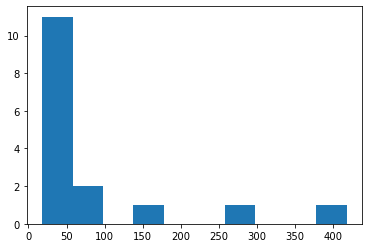

In [85]:
a = Autocomplete("words.txt")
print(a._first_index_of("urs"), a._last_index_of("urs"))
print(a._first_index_of("lit"), a._last_index_of("lit"))
print(a._first_index_of("night"), a._last_index_of("night"))
print(a._first_index_of("shite"), a._last_index_of("shite"))
print(a._first_index_of("cry"), a._last_index_of("cry"))
print(a._first_index_of("qua"), a._last_index_of("qua"))
print(a._first_index_of("motha"), a._last_index_of("motha"))
print(a._first_index_of("bug"), a._last_index_of("bug"))
plt.hist(a._time_list)